# Dataset boolean7: sentences conjoined by or

Generating sentences of the form

- 1) **c is P or d is Q, neither c is P nor d is Q** (contradiction)

- 2) **c is P or d is Q, c is not P and d is not Q** (contradiction)

- 3) **c is P or d is Q, c is not P or d is not Q** (non-contradiction)

- 4) **c is P or d is Q, c (d) is not P (Q)** (non-contradiction)

In [1]:
import numpy as np
import pandas as pd
from word_lists import name_list, positive_personality_list
from word_lists import apparance_list, negative_personality_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [2]:
def get_new_item(item_list, src_list):
    size = len(src_list)
    new_item = src_list[np.random.choice(size)]
    while new_item in item_list: 
        new_i = np.random.choice(size)
        new_item = src_list[new_i]
    return new_item

### Generating atoms

In [3]:
qualities = positive_personality_list + apparance_list + negative_personality_list
upper_bound = 11000/4

### Generating all types of sentences

- 1) **c is P or d is Q, neither c is P nor d is Q** (contradiction)

In [4]:
all_sentences_1 = []
for i in range(int(upper_bound)):
    person1 = get_new_item([], name_list)
    person2 = get_new_item([person1], name_list)
    pred1 = get_new_item([], qualities)
    pred2 = get_new_item([pred1], qualities)
    sentence = "{} is {} or {} is {}, neither {} is {} nor {} is {}".format(person1,
                                                                            pred1,
                                                                            person2,
                                                                            pred2,
                                                                            person1,
                                                                            pred1,
                                                                            person2,
                                                                            pred2)
    all_sentences_1.append(sentence)
    
all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)

['Gloria is attractive or Elaine is zealous', ' neither Gloria is attractive nor Elaine is zealous', 1]
['Pamela is pitiful or Julie is nervous', ' neither Pamela is pitiful nor Julie is nervous', 1]
['Gertrude is gorgeous or Geraldine is plain', ' neither Gertrude is gorgeous nor Geraldine is plain', 1]
['Valerie is embarrassed or Cecil is chubby', ' neither Valerie is embarrassed nor Cecil is chubby', 1]
['Oscar is zealous or Eugene is flabby', ' neither Oscar is zealous nor Eugene is flabby', 1]
['Clarence is faithful or Chad is elegant', ' neither Clarence is faithful nor Chad is elegant', 1]
['Eddie is bewildered or Willie is plain', ' neither Eddie is bewildered nor Willie is plain', 1]
['Allison is attractive or Jim is helpless', ' neither Allison is attractive nor Jim is helpless', 1]
['William is aggressive or Glenda is beautiful', ' neither William is aggressive nor Glenda is beautiful', 1]
['Toni is proud or Joel is grumpy', ' neither Toni is proud nor Joel is grumpy', 1]


- 2) **c is P or d is Q, c is not P and d is not Q** (contradiction)

In [5]:
all_sentences_2 = []
for i in range(int(upper_bound)):
    person1 = get_new_item([], name_list)
    person2 = get_new_item([person1], name_list)
    pred1 = get_new_item([], qualities)
    pred2 = get_new_item([pred1], qualities)
    sentence = "{} is {} or {} is {}, {} is not {} and {} is not {}".format(person1,
                                                                            pred1,
                                                                            person2,
                                                                            pred2,
                                                                            person1,
                                                                            pred1,
                                                                            person2,
                                                                            pred2)
    all_sentences_2.append(sentence)
    
all_sentences_2 = [sentence.split(",") + [1] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)

['Rodney is proud or Stanley is beautiful', ' Rodney is not proud and Stanley is not beautiful', 1]
['Joseph is obedient or Mitchell is zealous', ' Joseph is not obedient and Mitchell is not zealous', 1]
['Joel is calm or Faye is zealous', ' Joel is not calm and Faye is not zealous', 1]
['Glenda is happy or Cory is wonderful', ' Glenda is not happy and Cory is not wonderful', 1]
['Julie is eager or Claude is nice', ' Julie is not eager and Claude is not nice', 1]
['Tara is short or Harry is wonderful', ' Tara is not short and Harry is not wonderful', 1]
['Ricardo is embarrassed or Vickie is lazy', ' Ricardo is not embarrassed and Vickie is not lazy', 1]
['Eleanor is bald or Tracy is witty', ' Eleanor is not bald and Tracy is not witty', 1]
['Christian is grumpy or Alberto is repulsive', ' Christian is not grumpy and Alberto is not repulsive', 1]
['Clifford is polite or Tara is short', ' Clifford is not polite and Tara is not short', 1]


- 3) **c is P or d is Q, c is not P or d is not Q** (non-contradiction)

In [6]:
all_sentences_3 = []
for i in range(int(upper_bound)):
    person1 = get_new_item([], name_list)
    person2 = get_new_item([person1], name_list)
    pred1 = get_new_item([], qualities)
    pred2 = get_new_item([pred1], qualities)
    sentence = "{} is {} or {} is {}, {} is not {} or {} is not {}".format(person1,
                                                                            pred1,
                                                                            person2,
                                                                            pred2,
                                                                            person1,
                                                                            pred1,
                                                                            person2,
                                                                            pred2)
    all_sentences_3.append(sentence)
    
all_sentences_3 = [sentence.split(",") + [0] for sentence in all_sentences_3]

for sentence in all_sentences_3[0:10]:
    print(sentence)

['Harold is plain or Clinton is brave', ' Harold is not plain or Clinton is not brave', 0]
['Pearl is thoughtless or Jorge is wonderful', ' Pearl is not thoughtless or Jorge is not wonderful', 0]
['Marshall is happy or Alberta is lively', ' Marshall is not happy or Alberta is not lively', 0]
['Nora is handsome or Naomi is eager', ' Nora is not handsome or Naomi is not eager', 0]
['Joanne is shapely or Viola is faithful', ' Joanne is not shapely or Viola is not faithful', 0]
['Armando is shapely or Leona is ugly', ' Armando is not shapely or Leona is not ugly', 0]
['Jerome is long or Jason is jealous', ' Jerome is not long or Jason is not jealous', 0]
['Yvette is victorious or Roberto is jolly', ' Yvette is not victorious or Roberto is not jolly', 0]
['Madeline is nervous or Alison is fancy', ' Madeline is not nervous or Alison is not fancy', 0]
['Kathryn is bald or Sonya is clumsy', ' Kathryn is not bald or Sonya is not clumsy', 0]


- 4) **c is P or d is Q, c (d) is not P (Q)** (non-contradiction)

In [7]:
all_sentences_4 = []
for i in range(int(upper_bound)):
    person1 = get_new_item([], name_list)
    person2 = get_new_item([person1], name_list)
    pred1 = get_new_item([], qualities)
    pred2 = get_new_item([pred1], qualities)
    if i % 2 == 0:
        person3 = person1
        pred3 = pred1
    else:
        person3 = person2
        pred3 = pred2
    sentence = "{} is {} or {} is {}, {} is not {}".format(person1,
                                                           pred1,
                                                           person2,
                                                           pred2,
                                                           person3,
                                                           pred3)
    all_sentences_4.append(sentence)
    
all_sentences_4 = [sentence.split(",") + [0] for sentence in all_sentences_4]

for sentence in all_sentences_4[0:10]:
    print(sentence)

['Ellen is embarrassed or Jessie is glamorous', ' Ellen is not embarrassed', 0]
['Marsha is obnoxious or Lillian is stocky', ' Lillian is not stocky', 0]
['Melissa is beautiful or Melvin is fancy', ' Melissa is not beautiful', 0]
['Ron is beautiful or Robert is lazy', ' Robert is not lazy', 0]
['Bill is gorgeous or Olga is beautiful', ' Bill is not gorgeous', 0]
['Elsie is drab or Christopher is witty', ' Christopher is not witty', 0]
['Maggie is helpless or Carlos is uptight', ' Maggie is not helpless', 0]
['Brian is delightful or Andy is stocky', ' Andy is not stocky', 0]
['Sally is shapely or Warren is beautiful', ' Sally is not shapely', 0]
['Paula is scary or Claire is shapely', ' Claire is not shapely', 0]


In [8]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)



size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)

all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size3))
print("type 4 size = {}".format(size4))
print("total size = {}".format(size))

type 1 size = 2750
type 2 size = 2750
type 3 size = 2750
type 4 size = 2750
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [9]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Penny is ugly or Christine is victorious,neither Penny is ugly nor Christine is victor...,1
10996,Nicole is elegant or Nellie is attractive,Nicole is not elegant and Nellie is not attra...,1
10997,Vanessa is quaint or Leslie is shapely,neither Vanessa is quaint nor Leslie is shapely,1
10998,Doris is angry or Melissa is panicky,Doris is not angry or Melissa is not panicky,0
10999,Candace is fierce or Gwendolyn is stocky,Candace is not fierce,0


#### Looking at the label distribution

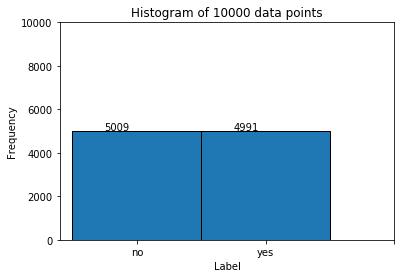

In [10]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "boolean7_train.png")

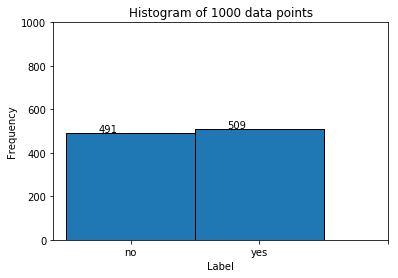

In [11]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "boolean7_test.png")

### Saving to CSV

In [12]:
df_train.to_csv("boolean7_train.csv", index=False)
df_test.to_csv("boolean7_test.csv", index=False)